## Import libraries

In [8]:
## importing libraries
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import applications
import matplotlib.pyplot as plt

## Initialization

In [9]:
## image dimensions
img_h, img_w = 150, 150

## epochs
epochs = 50

## batch Size
batch_size = 16

## total no of train and validation samples
nb_train_samples = 1700
nb_validation_samples = 500

## data set directory
train_data_dir = r'..\Data\train'
validation_data_dir = r'..\Data\validation'

## weights of VGG16
top_model_weights_path = r'bottleneck_fc_model.h5'

## Record bottleneck features

In [10]:
## data augmentation
datagen = ImageDataGenerator(rescale=1./255)

## VGG16 model
model = applications.vgg16.VGG16(include_top = False, weights = 'imagenet')

## train data
generator = datagen.flow_from_directory(train_data_dir, 
                                        target_size = (img_h, img_w), 
                                        batch_size = batch_size, 
                                        class_mode = None, 
                                        shuffle = False)

bottleneck_features_train = model.predict(generator, nb_train_samples // batch_size)

np.save(open('bottleneck_features_train.npy', 'wb'), bottleneck_features_train)

## validation data
generator = datagen.flow_from_directory(validation_data_dir, 
                                        target_size = (img_h, img_w), 
                                        batch_size = batch_size, 
                                        class_mode = None, 
                                        shuffle = False)

bottleneck_features_validation = model.predict(generator, nb_validation_samples // batch_size)

np.save(open('bottleneck_features_validation.npy', 'wb'), bottleneck_features_validation)

Found 1700 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Model

In [15]:
## loading train data and creating train labels
train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
train_labels = np.array([0] * int(nb_train_samples / 2) + [1] * int(nb_train_samples / 2))

## loading validation data and creating validation labels
validation_data = np.load(open('bottleneck_features_validation.npy', 'rb'))
validation_labels = np.array([0] * int(nb_validation_samples / 2) + [1] * int(nb_validation_samples / 2))

## model type
model = Sequential()

## hidden layer
model.add(Flatten(input_shape = train_data.shape[1:]))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation = 'sigmoid'))

## compile model
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

## Train

Epoch 1/50
107/107 [==============================] - 1s 5ms/step - loss: 0.6357 - accuracy: 0.7282 - val_loss: 0.3585 - val_accuracy: 0.8420
Epoch 2/50
107/107 [==============================] - 0s 3ms/step - loss: 0.3487 - accuracy: 0.8441 - val_loss: 0.3455 - val_accuracy: 0.8640
Epoch 3/50
107/107 [==============================] - 0s 3ms/step - loss: 0.2632 - accuracy: 0.8824 - val_loss: 0.3163 - val_accuracy: 0.8480
Epoch 4/50
107/107 [==============================] - 0s 3ms/step - loss: 0.2163 - accuracy: 0.9059 - val_loss: 0.4837 - val_accuracy: 0.7920
Epoch 5/50
107/107 [==============================] - 0s 2ms/step - loss: 0.1764 - accuracy: 0.9300 - val_loss: 0.3421 - val_accuracy: 0.8500
Epoch 6/50
107/107 [==============================] - 0s 2ms/step - loss: 0.1528 - accuracy: 0.9335 - val_loss: 0.5315 - val_accuracy: 0.8100
Epoch 7/50
107/107 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9253 - val_loss: 0.3673 - val_accuracy: 0.8440
Epoch 

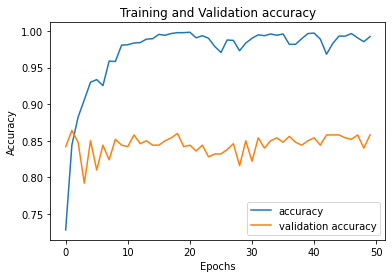

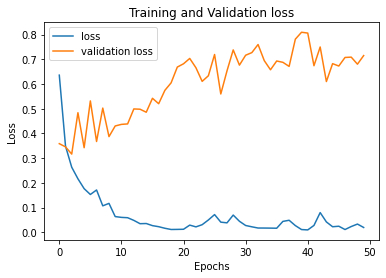

In [16]:
## training and testing model with the data set
history = model.fit(train_data, 
                  train_labels, 
                  epochs = epochs, 
                  batch_size = batch_size, 
                  validation_data=(validation_data, validation_labels))

## plot accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.legend(['accuracy','validation accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## plot loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.legend(['loss','validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## saving the weights of model
model.save_weights(top_model_weights_path)